In [1]:
import numpy as np
import os
from finn.core.datatype import DataType
from final_011903.output_final.driver.driver_base import FINNExampleOverlay
from tqdm import tqdm
# import torch

In [2]:
build_dir = "final_011903"
bitfile = f"./{build_dir}/output_final/bitfile/finn-accel.bit"
platform = "zynq-iodma"
io_shape_dict = {
    # FINN DataType for input and output tensors
    "idt" : [DataType['INT8']],
    "odt" : [DataType['INT8']],
    # shapes for input and output tensors (NHWC layout)
    "ishape_normal" : [(1, 1, 128, 1)],
    "oshape_normal" : [(1, 8)],
    # folded / packed shapes below depend on idt/odt and input/output
    # PE/SIMD parallelization settings -- these are calculated by the
    # FINN compiler.
    "ishape_folded" : [(1, 1, 128, 1, 1)],
    "oshape_folded" : [(1, 8, 1)],
    "ishape_packed" : [(1, 1, 128, 1, 1)],
    "oshape_packed" : [(1, 8, 1)],
    "input_dma_name" : ['idma0'],
    "output_dma_name" : ['odma0'],
    "number_of_external_weights": 0,
    "num_inputs" : 1,
    "num_outputs" : 1,
}
batch_size = 1
runtime_weight_dir = f"./{build_dir}/runtime_weights/"


verif_model_filename = "./{build_dir}/brevitas07-IEEE-verification.onnx"

In [3]:
%%time
accel = FINNExampleOverlay(
        bitfile_name = bitfile, platform = platform,
        io_shape_dict = io_shape_dict, batch_size = batch_size,
        runtime_weight_dir = runtime_weight_dir
    )

CPU times: user 393 ms, sys: 149 ms, total: 541 ms
Wall time: 612 ms


In [4]:
demo_data=[]
demo_data = np.load('demo_109_20000_v1.npy').astype("float32")

# ian test
# mean_val = demo_data.mean()
# std_val = demo_data.std()
# demo_data = demo_data - mean_val
# demo_data = demo_data/std_val
# print(demo_data.std())


In [5]:
'''
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], '-')
n = 360
def init():
    ax.set_xlim(0, n)
    ax.set_ylim(-2, 2)
    return ln,
def update(i):
    if i % n == 0:
        ln.axes.set_xlim(int(i/n)*n, int(i/n)*n+n)
    else:
        xdata.append(i)
        ydata.append(demo_data[i])
        ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, init_func=init, blit=False, interval=10, repeat=False)
'''

"\n%matplotlib notebook\nimport numpy as np\nimport matplotlib.pyplot as plt\nfrom matplotlib.animation import FuncAnimation\nfig, ax = plt.subplots()\nxdata, ydata = [], []\nln, = plt.plot([], [], '-')\nn = 360\ndef init():\n    ax.set_xlim(0, n)\n    ax.set_ylim(-2, 2)\n    return ln,\ndef update(i):\n    if i % n == 0:\n        ln.axes.set_xlim(int(i/n)*n, int(i/n)*n+n)\n    else:\n        xdata.append(i)\n        ydata.append(demo_data[i])\n        ln.set_data(xdata, ydata)\n    return ln,\n\nani = FuncAnimation(fig, update, init_func=init, blit=False, interval=10, repeat=False)\n"

The number of  peaks :  87
The index  of  peaks :  [114, 346, 555, 737, 1053, 1289, 1526, 1772, 2001, 2223, 2439, 2590, 2719, 2886, 3119, 3357, 3589, 3746, 3919, 4044, 4269, 4486, 4694, 4911, 5131, 5363, 5597, 5823, 6050, 6267, 6486, 6702, 6921, 7137, 7361, 7588, 7828, 8072, 8295, 8516, 8742, 8976, 9201, 9427, 9663, 9906, 10152, 10394, 10624, 10850, 11079, 11319, 11553, 11788, 12034, 12282, 12528, 12771, 13001, 13233, 13468, 13719, 13970, 14217, 14467, 14718, 14962, 15206, 15441, 15674, 15923, 16187, 16442, 16690, 16941, 17183, 17429, 17668, 17908, 18159, 18427, 18684, 18933, 19180, 19420, 19665, 19914]


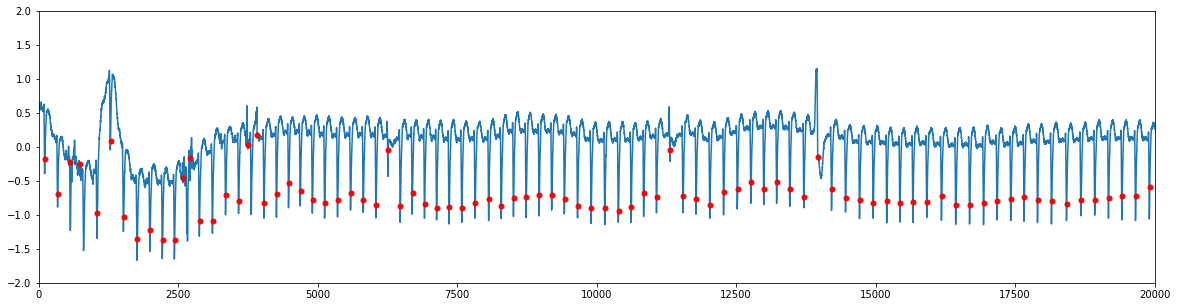

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from ecgdetectors import Detectors
detectors = Detectors(360.0)
#r_peaks = detectors.two_average_detector(demo_data)
#r_peaks = detectors.pan_tompkins_detector(demo_data)
r_peaks = detectors.swt_detector(demo_data)
#r_peaks=[111,343,571,807,1048,1287]
plt.figure(figsize=(20,5))
plt.plot(np.arange(0,len(demo_data)),demo_data)
plt.xlim(0,len(demo_data))
plt.ylim(-2,2)
plt.plot(r_peaks,demo_data[r_peaks],color='red', marker="o", ls="", ms=5 )


print('The number of  peaks : ', len(r_peaks))
print('The index  of  peaks : ', r_peaks)

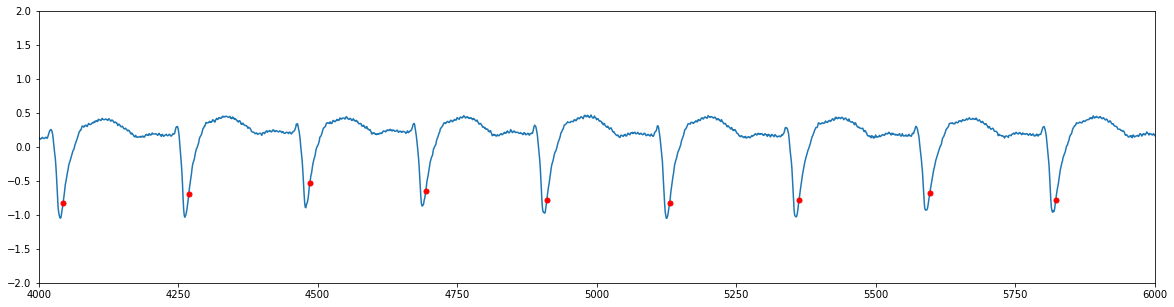

In [7]:
#### wave of Demo_data ####

%matplotlib inline
from matplotlib import pyplot as plt

plt.figure(figsize=(20,5))
plt.plot(np.arange(0,len(demo_data[0:8000])),demo_data[0:8000])
plt.xlim(4000,len(demo_data[4000:8000])+2000)
plt.ylim(-2,2)
plt.plot(r_peaks,demo_data[r_peaks],color='red', marker="o", ls="", ms=5 )


In [8]:
test_data=[0]*len(r_peaks)

for i in range(len(r_peaks)):
    test_data[i]=demo_data[(r_peaks[i]-64):(r_peaks[i]+64)].astype("float32")


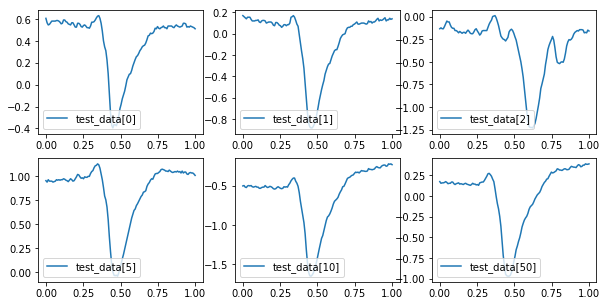

In [9]:
#### wave of test_data ####

%matplotlib inline
from matplotlib import pyplot as plt

x = np.linspace(0,1,len(test_data[0]) )

fig, ((ax1, ax2, ax3),( ax4, ax5, ax6)) = plt.subplots(2, 3,figsize=(10,5))
ax1.plot(x, test_data[0],label='test_data[0]')
ax2.plot(x, test_data[1],label='test_data[1]')
ax3.plot(x, test_data[2],label='test_data[2]')
ax4.plot(x, test_data[5],label='test_data[5]')
ax5.plot(x, test_data[10],label='test_data[10]')
ax6.plot(x, test_data[50],label='test_data[50]')
ax1.legend(loc='lower left')
ax2.legend(loc='lower left')
ax3.legend(loc='lower left')
ax4.legend(loc='lower left')
ax5.legend(loc='lower left')
ax6.legend(loc='lower left')


In [10]:
for i in range(len(r_peaks)):
#for i in range(6):
    ibuf_normal = test_data[i]
    mean_val = ibuf_normal.mean()
    ibuf_normal = ibuf_normal-mean_val
    range_val = ibuf_normal.max() if ibuf_normal.max() > -ibuf_normal.min() else -ibuf_normal.min()
    range_val = range_val / 120
    ibuf_normal = (ibuf_normal/range_val)

    ibuf_normal = ibuf_normal.reshape(1,1,128,1).astype(np.int8)

    obuf_normal = accel.execute(ibuf_normal)
    print("Class : " , obuf_normal.argmax(),",r_peaks_num :",i , ',r_peak.index :',r_peaks[i])

Class :  2 ,r_peaks_num : 0 ,r_peak.index : 114
Class :  2 ,r_peaks_num : 1 ,r_peak.index : 346
Class :  1 ,r_peaks_num : 2 ,r_peak.index : 555
Class :  1 ,r_peaks_num : 3 ,r_peak.index : 737
Class :  2 ,r_peaks_num : 4 ,r_peak.index : 1053
Class :  2 ,r_peaks_num : 5 ,r_peak.index : 1289
Class :  1 ,r_peaks_num : 6 ,r_peak.index : 1526
Class :  1 ,r_peaks_num : 7 ,r_peak.index : 1772
Class :  2 ,r_peaks_num : 8 ,r_peak.index : 2001
Class :  2 ,r_peaks_num : 9 ,r_peak.index : 2223
Class :  2 ,r_peaks_num : 10 ,r_peak.index : 2439
Class :  1 ,r_peaks_num : 11 ,r_peak.index : 2590
Class :  0 ,r_peaks_num : 12 ,r_peak.index : 2719
Class :  2 ,r_peaks_num : 13 ,r_peak.index : 2886
Class :  2 ,r_peaks_num : 14 ,r_peak.index : 3119
Class :  2 ,r_peaks_num : 15 ,r_peak.index : 3357
Class :  2 ,r_peaks_num : 16 ,r_peak.index : 3589
Class :  1 ,r_peaks_num : 17 ,r_peak.index : 3746
Class :  1 ,r_peaks_num : 18 ,r_peak.index : 3919
Class :  2 ,r_peaks_num : 19 ,r_peak.index : 4044
Class :  2 ,r_

The number of  peaks :  80
The index  of  peaks :  [336, 570, 807, 1026, 1263, 1498, 1741, 1977, 2219, 2456, 2702, 2946, 3193, 3446, 3696, 3943, 4192, 4435, 4690, 4940, 5192, 5434, 5687, 5937, 6186, 6427, 6691, 6934, 7173, 7414, 7668, 7914, 8159, 8386, 8627, 8870, 9106, 9342, 9583, 9826, 10068, 10307, 10544, 10797, 11043, 11288, 11537, 11786, 12040, 12290, 12549, 12803, 13055, 13303, 13562, 13814, 14064, 14311, 14563, 14813, 15061, 15315, 15569, 15819, 16068, 16320, 16575, 16829, 17083, 17326, 17581, 17835, 18089, 18343, 18606, 18866, 19121, 19368, 19641, 19894]


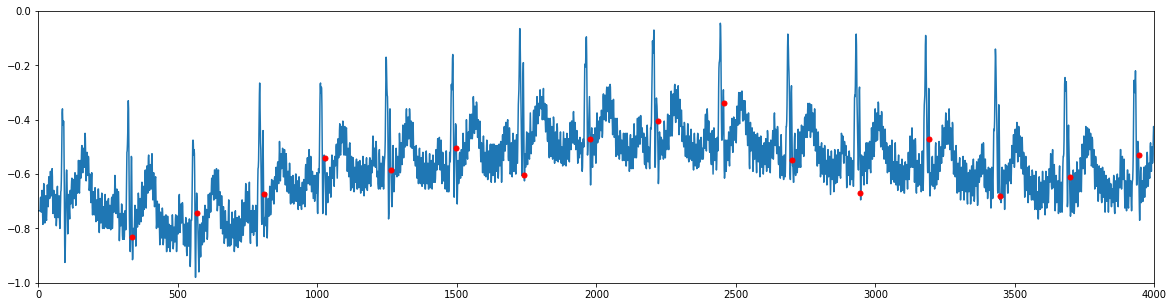

In [11]:
######## Demo for normal ecg signal #########
demo_data=[]
demo_data = np.load('demo_122_20000_v1.npy').astype("float32")

%matplotlib inline
import matplotlib.pyplot as plt
from ecgdetectors import Detectors
detectors = Detectors(360.0)
#r_peaks = detectors.two_average_detector(demo_data)
#r_peaks = detectors.pan_tompkins_detector(demo_data)
r_peaks = detectors.swt_detector(demo_data)
#r_peaks=[111,343,571,807,1048,1287]
plt.figure(figsize=(20,5))
plt.plot(np.arange(0,len(demo_data[0:4000])),demo_data[0:4000])
plt.xlim(0,len(demo_data[0:4000]))
plt.ylim(-1,0)
plt.plot(r_peaks,demo_data[r_peaks],color='red', marker="o", ls="", ms=5 )


print('The number of  peaks : ', len(r_peaks))
print('The index  of  peaks : ', r_peaks)

In [12]:
test_data=[0]*len(r_peaks)

for i in range(len(r_peaks)):
    test_data[i]=demo_data[(r_peaks[i]-64):(r_peaks[i]+64)].astype("float32")


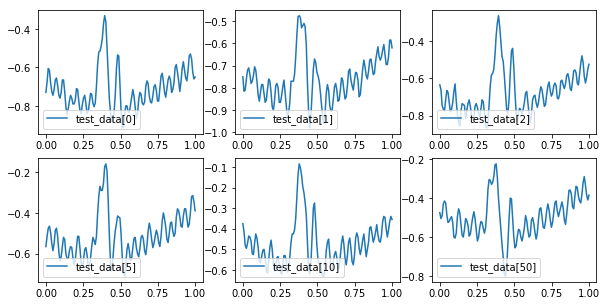

In [13]:
#### wave of test_data ####

%matplotlib inline
from matplotlib import pyplot as plt

x = np.linspace(0,1,len(test_data[0]) )

fig, ((ax1, ax2, ax3),( ax4, ax5, ax6)) = plt.subplots(2, 3,figsize=(10,5))
ax1.plot(x, test_data[0],label='test_data[0]')
ax2.plot(x, test_data[1],label='test_data[1]')
ax3.plot(x, test_data[2],label='test_data[2]')
ax4.plot(x, test_data[5],label='test_data[5]')
ax5.plot(x, test_data[10],label='test_data[10]')
ax6.plot(x, test_data[50],label='test_data[50]')
ax1.legend(loc='lower left')
ax2.legend(loc='lower left')
ax3.legend(loc='lower left')
ax4.legend(loc='lower left')
ax5.legend(loc='lower left')
ax6.legend(loc='lower left')



In [14]:
for i in range(len(r_peaks)):
#for i in range(6):
    ibuf_normal = test_data[i]
    mean_val = ibuf_normal.mean()
    ibuf_normal = ibuf_normal-mean_val
    range_val = ibuf_normal.max() if ibuf_normal.max() > -ibuf_normal.min() else -ibuf_normal.min()
    range_val = range_val / 120
    ibuf_normal = (ibuf_normal/range_val)

    ibuf_normal = ibuf_normal.reshape(1,1,128,1).astype(np.int8)

    obuf_normal = accel.execute(ibuf_normal)
    print("Class : " , obuf_normal.argmax(),",r_peaks_num :",i , ',r_peak.index :',r_peaks[i])

Class :  0 ,r_peaks_num : 0 ,r_peak.index : 336
Class :  0 ,r_peaks_num : 1 ,r_peak.index : 570
Class :  0 ,r_peaks_num : 2 ,r_peak.index : 807
Class :  0 ,r_peaks_num : 3 ,r_peak.index : 1026
Class :  0 ,r_peaks_num : 4 ,r_peak.index : 1263
Class :  0 ,r_peaks_num : 5 ,r_peak.index : 1498
Class :  0 ,r_peaks_num : 6 ,r_peak.index : 1741
Class :  0 ,r_peaks_num : 7 ,r_peak.index : 1977
Class :  0 ,r_peaks_num : 8 ,r_peak.index : 2219
Class :  0 ,r_peaks_num : 9 ,r_peak.index : 2456
Class :  0 ,r_peaks_num : 10 ,r_peak.index : 2702
Class :  0 ,r_peaks_num : 11 ,r_peak.index : 2946
Class :  0 ,r_peaks_num : 12 ,r_peak.index : 3193
Class :  0 ,r_peaks_num : 13 ,r_peak.index : 3446
Class :  0 ,r_peaks_num : 14 ,r_peak.index : 3696
Class :  0 ,r_peaks_num : 15 ,r_peak.index : 3943
Class :  0 ,r_peaks_num : 16 ,r_peak.index : 4192
Class :  0 ,r_peaks_num : 17 ,r_peak.index : 4435
Class :  0 ,r_peaks_num : 18 ,r_peak.index : 4690
Class :  0 ,r_peaks_num : 19 ,r_peak.index : 4940
Class :  0 ,r